In [2]:
##################################################################
#       ENV717 - S2024                                           #                            
#       Read and analyze PJM demand   - Plot CDF                 #
##################################################################
#### Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### OPTIONAL (UNNECESSARY) STEPS MARKED WITH * (INCLUDED TO HELP YOU REMEMBER a Python tool)
###################################################################################################################
## 1. Read the demand csv file into a dataframe (df) using pd.read.csv                                            #                                       #
##   -Read the first row (i.e., row 0) as the headers                                                             #
## 2. See the columns in this spreadsheet by printing the first five rows                                         #
###################################################################################################################
df_demand=pd.read_csv("C://Users//dp52//Documents//ENV717-S2024//hrl_dmd_bids_2022.csv",header=0) #1.
df_demand.head(5) #2.

,datetime_beginning_utc,datetime_beginning_ept,area,hrly_da_demand_bid
0,1/1/2023 4:00,12/31/2022 23:00,MID_ATLANTIC_REGION,24628
1,1/1/2023 4:00,12/31/2022 23:00,WESTERN_REGION,37634
2,1/1/2023 4:00,12/31/2022 23:00,PJM_RTO,72835
3,1/1/2023 3:00,12/31/2022 22:00,MID_ATLANTIC_REGION,26191
4,1/1/2023 3:00,12/31/2022 22:00,WESTERN_REGION,39714


In [3]:
# *see how many rows in the dataframe df_demand - not counting the row with the headers
len(df_demand)

26280

In [4]:
# There are three columns for each hour because this contains the demand of three areas.
# We only want PJM_RTO so we will remove the other two areas
df_demandPJM=df_demand.loc[df_demand.area=="PJM_RTO"]
df_demandPJM.head(5)

,datetime_beginning_utc,datetime_beginning_ept,area,hrly_da_demand_bid
2,1/1/2023 4:00,12/31/2022 23:00,PJM_RTO,72835
5,1/1/2023 3:00,12/31/2022 22:00,PJM_RTO,76891
8,1/1/2023 2:00,12/31/2022 21:00,PJM_RTO,80787
11,1/1/2023 1:00,12/31/2022 20:00,PJM_RTO,82890
14,1/1/2023 0:00,12/31/2022 19:00,PJM_RTO,83720


In [5]:
# *see how many rows in the new df - not counting the row with the headers
len(df_demandPJM)

8760

In [56]:
# We saw thare are 8760 so we have one demand value per hour
# *check the types of the columns
df_demandPJM.dtypes

datetime_beginning_utc    object
datetime_beginning_ept    object
area                      object
hrly_da_demand_bid         int64
dtype: object

In [6]:
##################################################################################################################
## We see there are two columns for date/time: 1. UTC, 2. EPC. EPC is the one we want                                 #
## HOWEVER, pd has not identified UTC and EPT columns as datetime values - (if we had read an xlsx file it would have)
## One way to identify the date/time columns as such is at the moment we create the df from the csv file
# We will read the file again

#First we create a vector with the names of the columns that have datetimes:
date_cols=['datetime_beginning_utc','datetime_beginning_ept']
#then we use pd.read.csv specifying the argument "parse_dates".
df_demand=pd.read_csv("C://Users//dp52//Documents//ENV717-S2023//hrl_dmd_bids_2022.csv",header=0,parse_dates=date_cols) 
df_demand.head(5) 

,datetime_beginning_utc,datetime_beginning_ept,area,hrly_da_demand_bid
0,2023-01-01 04:00:00,2022-12-31 23:00:00,MID_ATLANTIC_REGION,24628
1,2023-01-01 04:00:00,2022-12-31 23:00:00,WESTERN_REGION,37634
2,2023-01-01 04:00:00,2022-12-31 23:00:00,PJM_RTO,72835
3,2023-01-01 03:00:00,2022-12-31 22:00:00,MID_ATLANTIC_REGION,26191
4,2023-01-01 03:00:00,2022-12-31 22:00:00,WESTERN_REGION,39714


In [7]:
# We need to drop the other areas and only leave PJM
df_demandPJM=df_demand.loc[df_demand.area=="PJM_RTO"]
df_demandPJM.head(5)

,datetime_beginning_utc,datetime_beginning_ept,area,hrly_da_demand_bid
2,2023-01-01 04:00:00,2022-12-31 23:00:00,PJM_RTO,72835
5,2023-01-01 03:00:00,2022-12-31 22:00:00,PJM_RTO,76891
8,2023-01-01 02:00:00,2022-12-31 21:00:00,PJM_RTO,80787
11,2023-01-01 01:00:00,2022-12-31 20:00:00,PJM_RTO,82890
14,2023-01-01 00:00:00,2022-12-31 19:00:00,PJM_RTO,83720


In [8]:
# Now we can check that the datetime columns are recognized as such
df_demandPJM.dtypes

datetime_beginning_utc    datetime64[ns]
datetime_beginning_ept    datetime64[ns]
area                              object
hrly_da_demand_bid                 int64
dtype: object

In [9]:
# We can now drop the columns we do not need using df.drop and the names of the columns
#we do not create a copy with the reduced df so we use "inplace=True"
df_demandPJM.drop(columns=['datetime_beginning_utc','area'],inplace=True)
df_demandPJM.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,datetime_beginning_ept,hrly_da_demand_bid
2,2022-12-31 23:00:00,72835
5,2022-12-31 22:00:00,76891
8,2022-12-31 21:00:00,80787
11,2022-12-31 20:00:00,82890
14,2022-12-31 19:00:00,83720


In [10]:
## We can get rid of the long names and make them something shorter and easier to manipulate
df_demandPJM.columns=['time','demand(MW)']
df_demandPJM.columns

Index(['time', 'demand(MW)'], dtype='object')

In [11]:
# We see the demand is sorted such that the last hour of the year appears first
# let's sort it so that the first hour of 2022 is the first row
# we can use pandas.DataFrame.sort_values - we do not need more arguments than the name of the column because 
# this, by default, sorts values in ascending order
df_demandPJM=df_demandPJM.sort_values('time')

In [12]:
# we can check that the values are now sorted
df_demandPJM.head(5)

,time,demand(MW)
26279,2022-01-01 00:00:00,69967
26276,2022-01-01 01:00:00,67228
26273,2022-01-01 02:00:00,64830
26270,2022-01-01 03:00:00,63771
26267,2022-01-01 04:00:00,63761


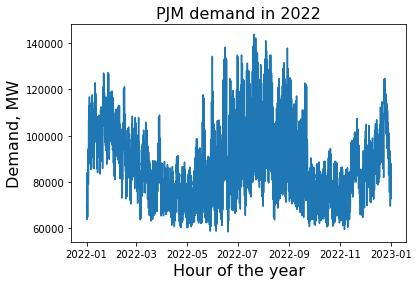

In [13]:
# Now we can plot the hour of the year on the x axis and the demand on the y axis
plt.plot(df_demandPJM['time'],df_demandPJM['demand(MW)'])
plt.xlabel('Hour of the year', fontsize=16)
plt.ylabel('Demand, MW', fontsize=16)
plt.title('PJM demand in 2022', fontsize=16)
plt.show()

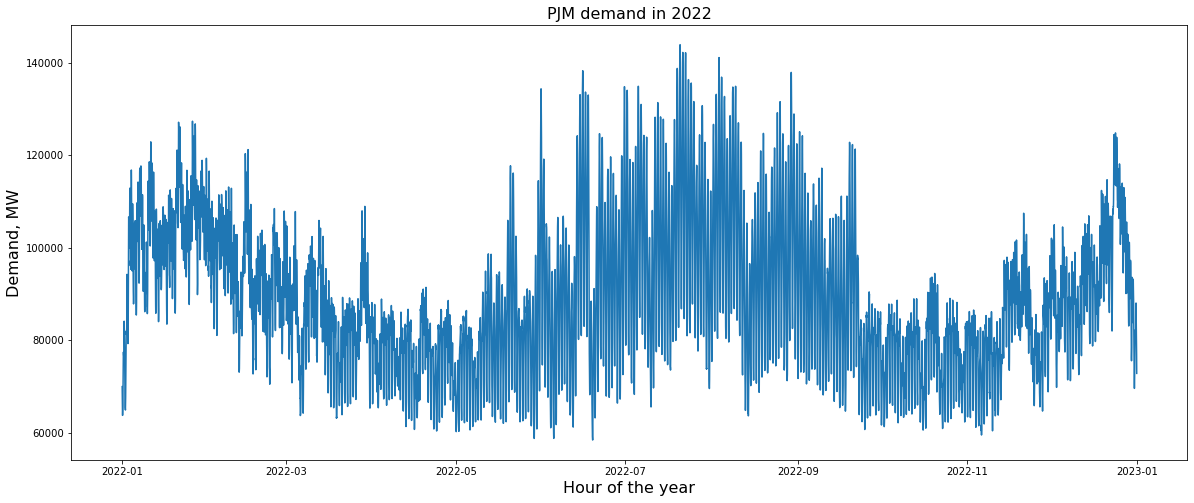

In [14]:
# We repeat the plot but this time we set the width and height to make it nicer
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(df_demandPJM['time'],df_demandPJM['demand(MW)'])
plt.xlabel('Hour of the year', fontsize=16)
plt.ylabel('Demand, MW', fontsize=16)
plt.title('PJM demand in 2022', fontsize=16)
plt.show()

In [15]:
#Although the plot above is nice, it would be more precise if we could see the days of the dates
#To have a better date/time format in the plot we import two additional libraries
import matplotlib.dates as mdates
import datetime as dt

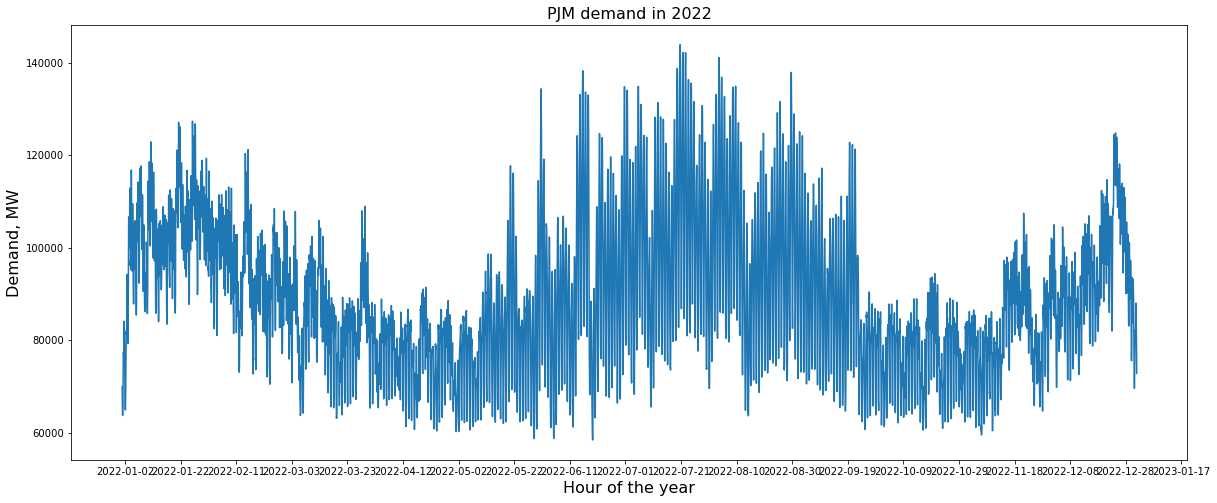

In [16]:
# We repeat the plot but this time set the format of the horizontal axis
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(df_demandPJM['time'],df_demandPJM['demand(MW)'])
plt.xlabel('Hour of the year', fontsize=16)
plt.ylabel('Demand, MW', fontsize=16)
plt.title('PJM demand in 2022', fontsize=16)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.show()

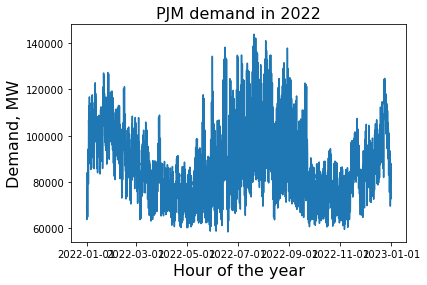

In [17]:
plt.plot(df_demandPJM['time'],df_demandPJM['demand(MW)'])
plt.xlabel('Hour of the year', fontsize=16)
plt.ylabel('Demand, MW', fontsize=16)
plt.title('PJM demand in 2022', fontsize=16)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

In [18]:
# Now lets look at the distribution of the demand by looking at some key percentiles
print('In 2019, 99% of the hours had a demand higher than',np.percentile(df_demandPJM['demand(MW)'],1),'MW')
print('         50% of the hours had a demand higher than',np.percentile(df_demandPJM['demand(MW)'],50),'MW')
print('         30% of the hours had a demand higher than',np.percentile(df_demandPJM['demand(MW)'],70),'MW')
print('         10% of the hours had a demand higher than',np.percentile(df_demandPJM['demand(MW)'],90),'MW')
print('         5% of the hours had a demand higher than',np.percentile(df_demandPJM['demand(MW)'],95),'MW')
print('         1% of the hours had a demand higher than',np.percentile(df_demandPJM['demand(MW)'],99),'MW')

In 2019, 99% of the hours had a demand higher than 62102.22 MW
         50% of the hours had a demand higher than 85960.5 MW
         30% of the hours had a demand higher than 96233.79999999999 MW
         10% of the hours had a demand higher than 112019.30000000002 MW
         5% of the hours had a demand higher than 120092.59999999999 MW
         1% of the hours had a demand higher than 132381.81 MW


In [19]:
# Let's fix it so that we only report 2 decimal points
# you could write '%.2f'% right before the value
print('In 2019, 99% of the hours had a demand higher than','%.2f' % np.percentile(df_demandPJM['demand(MW)'],1),'MW')
print('         50% of the hours had a demand higher than','%.2f' % np.percentile(df_demandPJM['demand(MW)'],50),'MW')
print('         30% of the hours had a demand higher than','%.2f' % np.percentile(df_demandPJM['demand(MW)'],70),'MW')
print('         10% of the hours had a demand higher than','%.2f' % np.percentile(df_demandPJM['demand(MW)'],90),'MW')
print('         5% of the hours had a demand higher than','%.2f' % np.percentile(df_demandPJM['demand(MW)'],95),'MW')
print('         1% of the hours had a demand higher than','%.2f' % np.percentile(df_demandPJM['demand(MW)'],99),'MW')

In 2019, 99% of the hours had a demand higher than 62102.22 MW
         50% of the hours had a demand higher than 85960.50 MW
         30% of the hours had a demand higher than 96233.80 MW
         10% of the hours had a demand higher than 112019.30 MW
         5% of the hours had a demand higher than 120092.60 MW
         1% of the hours had a demand higher than 132381.81 MW


In [20]:
# Now let's build the (empirical) CDF of the demand
demand_sorted=df_demandPJM.sort_values('demand(MW)') # sorts from least demand to highest demand
demand_sorted.head(5)

,time,demand(MW)
14096,2022-06-19 06:00:00,58430
14099,2022-06-19 05:00:00,58614
15611,2022-05-29 05:00:00,58777
15104,2022-06-05 06:00:00,58783
15608,2022-05-29 06:00:00,59071


In [21]:
#Now, let's create and array that has the percentile corresponding to each (ordered) demand value
#The 8760th demand value will be the percentile 100 or have a CDF of 1
#The 876th demand value will be the percentile 10 or have a CDF of 0.1
#let's first remember how to use np.array - np.array(range(N)) creates an array of elements 0, 1, 2,..N
# for example
a=np.array(range(5))
print("The array a that we just created is",a[:])


The array a that we just created is [0 1 2 3 4]


In [22]:
CDF=np.array(range(8760))
print("The first elements of the CDF array are", CDF[0:6])
print("The last elements of the CDF array are",CDF[8755:8760])

The first elements of the CDF array are [0 1 2 3 4 5]
The last elements of the CDF array are [8755 8756 8757 8758 8759]


In [23]:
# Now we adjust CDF so the first element has 1, the second has 2 etc.. by adding 1
CDF=CDF+1
print("The first five elements of the adjusted CDF array are",CDF[0:6])

The first five elements of the adjusted CDF array are [1 2 3 4 5 6]


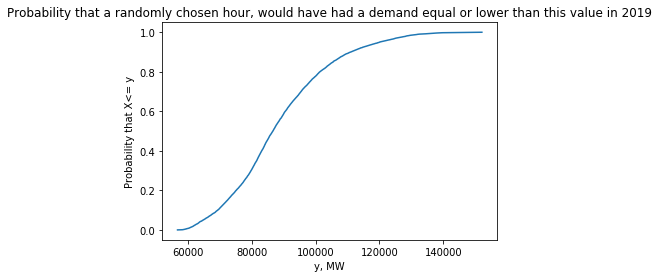

In [54]:
CDF = CDF/float(8760)
plt.plot(demand_sorted['demand'], CDF)
plt.xlabel('y, MW')
plt.ylabel('Probability that X<= y')
plt.title('Probability that a randomly chosen hour, would have had a demand equal or lower than this value in 2019')
plt.show()